In [2]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from plotting import plot_octagon, plot_trajectory
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

In [3]:
drop_p_choose_high = True
drop_box_plot = False
drop_scatter_plot = True

### Plot the probability of choosing High across solo and social conditions
Drop points if there are too few trials after filtering the trials list and dropping initial trials

In [4]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [5]:
if not drop_p_choose_high:
    _, trial_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_all_solo, combine=False)

In [6]:
_, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)
trial_lists_social = trial_lists_social

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_Franc

In [7]:
# get the probability of choosing the wall for solo and social sessions, with cut_solo_trials trials dropped from the start of the first solo session
if not drop_p_choose_high:
    (probability_choose_high_social_array,
    probability_choose_high_solo_array,
    probability_choose_high_solo_array_first_session,
    probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trial_lists_solo,
                                                                                                                                            trial_lists_social,
                                                                                                                                            wall_sep=4,
                                                                                                                                            trial_type=globals.HIGH_LOW,
                                                                                                                                            cut_solo_trials=5)  

In [8]:
if not drop_p_choose_high:

    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

In [9]:
if not drop_p_choose_high:
    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [10]:
if not drop_p_choose_high:

    trial_lists_filtered = []
    for trial_list in trial_lists_solo:

        trial_list = trial_list[5:]
        
        a = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
        trial_list = [trial_list[i] for i in a]

        b = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=4)
        trial_list = [trial_list[i] for i in b]

        print(len(trial_list))
        trial_lists_filtered.append(trial_list)




    print(f"Sum: {sum(1 for trial_list in trial_lists_filtered if len(trial_list) <= 4)}")
    print(f"Total sum: {len(trial_lists_filtered)}")


### Plot the probability of choosing the low wall across different conditions
Inferred losers choice seems to be slow mainly because of get_wall_visible (20-30 ms seconds for each trial for each player)

The main function called in probability_first_wall_chosen_and_low_multiple_sessions_df, first_visible_wall_chosen_session, accounts for basically all of the time in this cell

Within first_visible_wall_chosen_session, it seems to only be get_wall_visible that takes up time on each trial loop 

The main function for inferring losers choice seems to only take about 200 ms per player per session

NB: This means it is not loser's inferred choice but identifying wall visibility (first wall vis, etc.) that is taking time

In [177]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    times_first_wall_chosen_when_low_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists_social[:12], wall_sep=2, inferred_choice=True, debug=False)
  (probability_first_wall_chosen_when_high_array,
    times_first_wall_chosen_when_high_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists_social[:12], wall_sep=2, inferred_choice=True, reverse=True, debug=False)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


trial list index: 0
player num: 0
player num: 1
trial list index: 1
player num: 0


d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


player num: 1
trial list index: 2
player num: 0
player num: 1
trial list index: 3
player num: 0
player num: 1
trial list index: 4
player num: 0
player num: 1
trial list index: 5
player num: 0
player num: 1
trial list index: 6
player num: 0
player num: 1
trial list index: 7
player num: 0
player num: 1
trial list index: 8
player num: 0
player num: 1
trial list index: 9
player num: 0
player num: 1
trial list index: 10
player num: 0
player num: 1
trial list index: 11
player num: 0
player num: 1
trial list index: 0
player num: 0
player num: 1
trial list index: 1
player num: 0
player num: 1
trial list index: 2
player num: 0
player num: 1
trial list index: 3
player num: 0
player num: 1
trial list index: 4
player num: 0
player num: 1
trial list index: 5
player num: 0
player num: 1
trial list index: 6
player num: 0
player num: 1
trial list index: 7
player num: 0
player num: 1
trial list index: 8
player num: 0
player num: 1
trial list index: 9
player num: 0
player num: 1
trial list index: 10
pla

In [178]:
times_first_wall_chosen_when_low_array,  times_first_wall_chosen_when_high_array

(array([[ 7.,  7.],
        [ 1.,  4.],
        [ 3.,  7.],
        [10., 14.],
        [ 4.,  5.],
        [ 6.,  5.],
        [ 8.,  5.],
        [ 3.,  6.],
        [ 6.,  4.],
        [ 7.,  6.],
        [ 5.,  7.],
        [ 7.,  4.]]),
 array([[ 6.,  7.],
        [ 2.,  4.],
        [ 7.,  8.],
        [ 6., 14.],
        [ 2.,  7.],
        [ 6.,  5.],
        [ 5., 10.],
        [ 8., 14.],
        [ 4., 13.],
        [10.,  5.],
        [ 4.,  6.],
        [ 7., 13.]]))

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


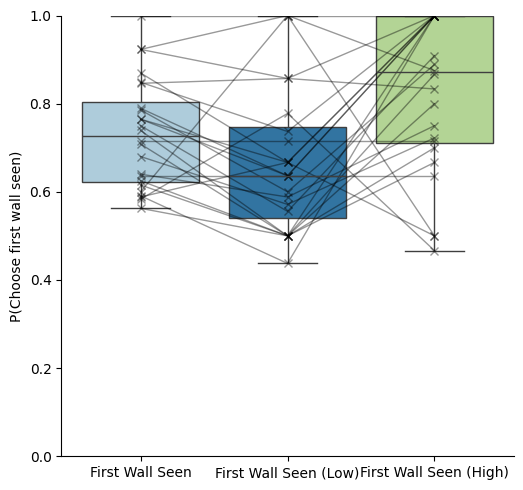

In [179]:
if not drop_box_plot:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels)

Histogram of trial number counts for the current condition, across players

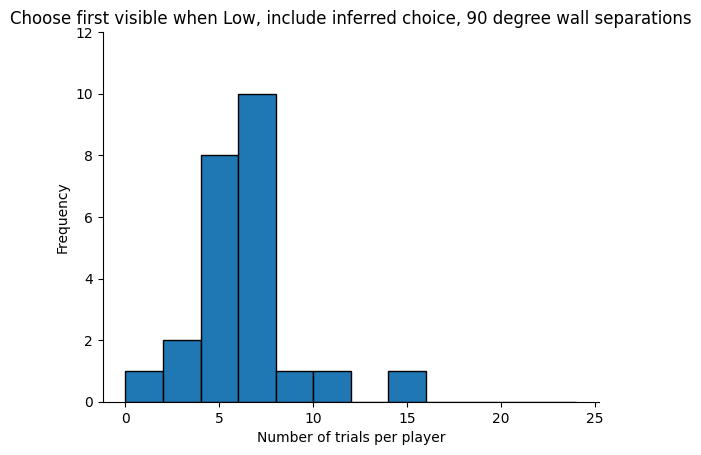

In [ ]:
data = times_first_wall_chosen_when_low_array.ravel()
plt.hist(data, bins=range(0,25,2), edgecolor='black')
plt.ylim([0, 12])
plt.title("Choose first visible when Low, include inferred choice, 180 degree wall separations")
plt.xlabel("Number of trials per player")
plt.ylabel("Frequency")

# Remove the top and right spines
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

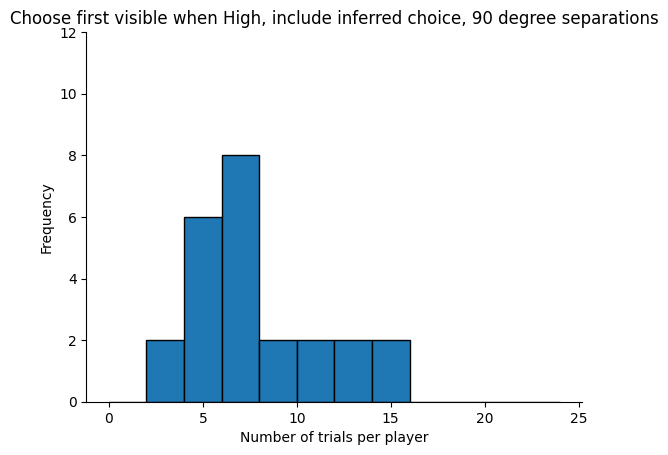

In [ ]:
data = times_first_wall_chosen_when_high_array.ravel()
plt.hist(data, bins=range(0,25,2), edgecolor='black')
plt.ylim([0, 12])
plt.title("Choose first visible when High, include inferred choice, 180 degree separations")
plt.xlabel("Number of trials per player")
plt.ylabel("Frequency")

# Remove the top and right spines
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Plot performance against probability of choosing Low when Low first visibile 

In [14]:
trial_lists_social_drop_5 = [trial_list for i,trial_list in enumerate(trial_lists_social) if i != 5]

In [15]:
if not drop_scatter_plot:
    plot_probability_chose_wall.plot_performance_against_probability_low_when_first_visible_df(trial_lists_social, correlation_line=True, print_correlation=True)